In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [4]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line, name_sensor):
    fig = plt.figure(figsize=(12,6), dpi=200)
    ax = fig.add_subplot(111)
    columns = dataframe.columns
    t = dataframe["up time recipe_67"]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["green"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]
        
        # Prediction of mu
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+ no_features], 
                     ax=ax,
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        
        
        # Confidence bound (+- 2 sigma)
        ax.fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5, label="Uncertainty Interval \n $(3\hat{\sigma})$")
        
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax, 
                        hue=columns[i+4*no_features+1],
                        palette=palette,
                        s=20,
                        linewidth=0)
        
        # Line to show known failures
        if line:
            for r, location in enumerate(location_line):
                if r == 0:
                    ax.axvline(location, 0,2, color="b", linestyle ="--", linewidth=3, label=label_line)
                else:
                    ax.axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5)
                
        # Set labels etc. 
        ax.legend(loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15),
                   fancybox=True, 
                   shadow=True, 
                   ncol=6,
                   prop={'size': 14})
        ax.tick_params(labelsize=12)
        ax.set_xlabel("Running time of machine with recipe No. 67 [in s]", fontsize=16)
        ax.set_ylabel("")
        ax.set_ylim(-4,2)
        ax.set_title("Sensor: IONGAUGEPRESSURE", fontsize=14)

# Visualisation and Evaluation of Prediction

In [5]:
# Name of Sensors
name_of_sensor = ["IONGAUGEPRESSURE",
                  "ETCHBEAMVOLTAGE",
                  "ETCHBEAMCURRENT",
                  "ETCHSUPPRESSORVOLTAGE",
                  "ETCHSUPPRESSORCURRENT",
                  "FLOWCOOLFLOWRATE",
                  "FLOWCOOLPRESSURE",
                  "ETCHGASCHANNEL1READBACK",
                  "ETCHPBNGASREADBACK",
                  "FIXTURETILTANGLE",
                  "ACTUALROTATIONANGLE",
                  "ACTUALSTEPDURATION"]

## Examples of predictions before failures 

In [6]:
artifical_data = pd.read_csv("../../files/classification/MLE/phm67_2sigma_vis.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time recipe_67"]>= 3470000) & (artifical_data["up time recipe_67"]<= 3558174)]

In [7]:
failures = [3556174.]

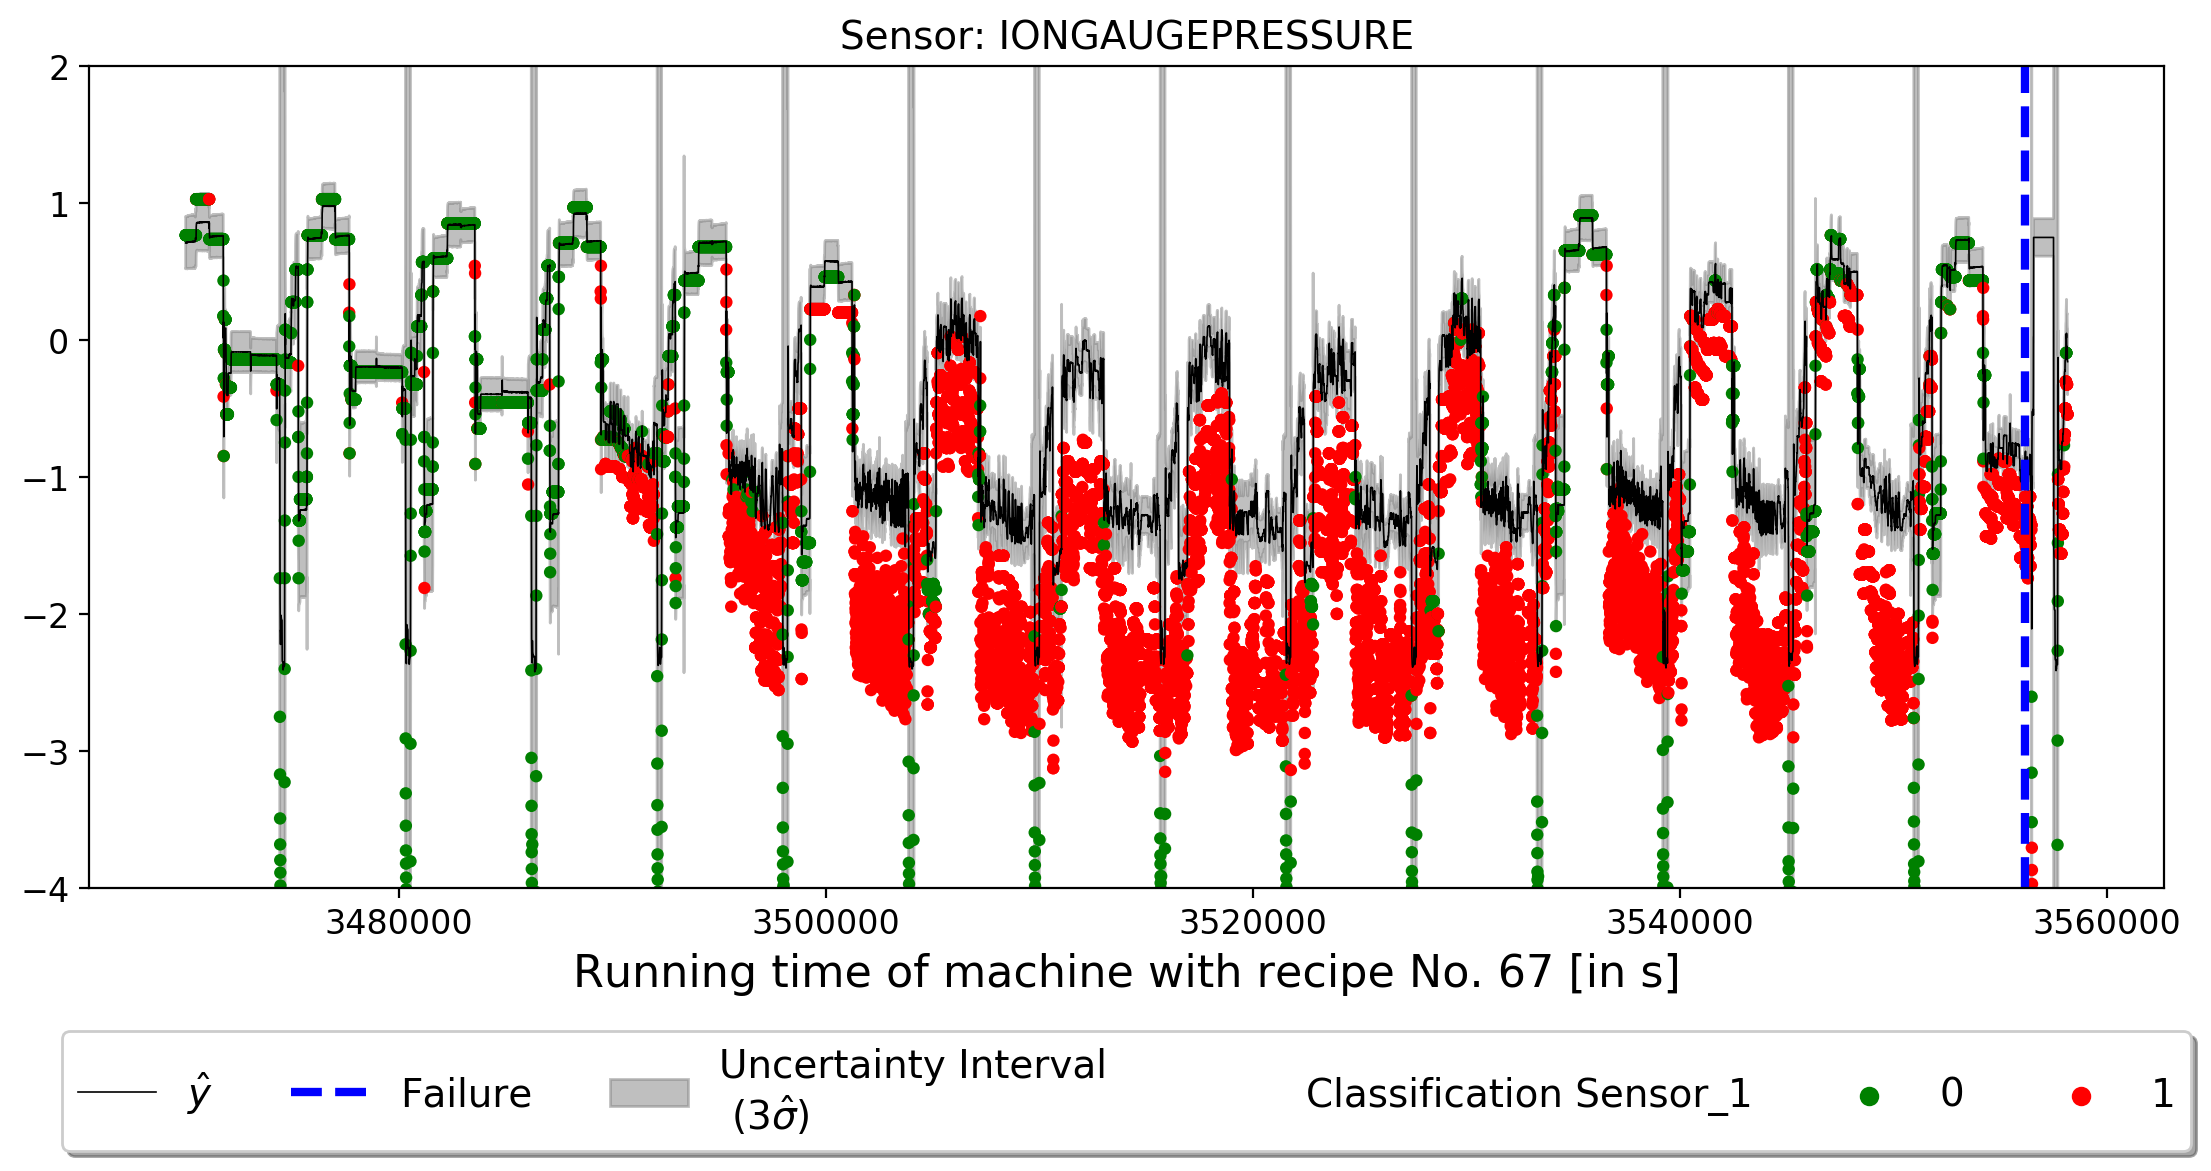

In [8]:
vis_classification(dataframe = subset_1,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=2,
                   line = True,
                   location_line = failures,
                   subset = 2,
                   label_line="Failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_error_paper.png")
plt.show()

In [37]:
artifical_data = pd.read_csv("../../files/classification/MLE/phm67_2sigma_vis.csv", sep=";")
subset_2 = artifical_data.loc[(artifical_data["up time recipe_67"]>= 3400000) & (artifical_data["up time recipe_67"]<= 3430000)]

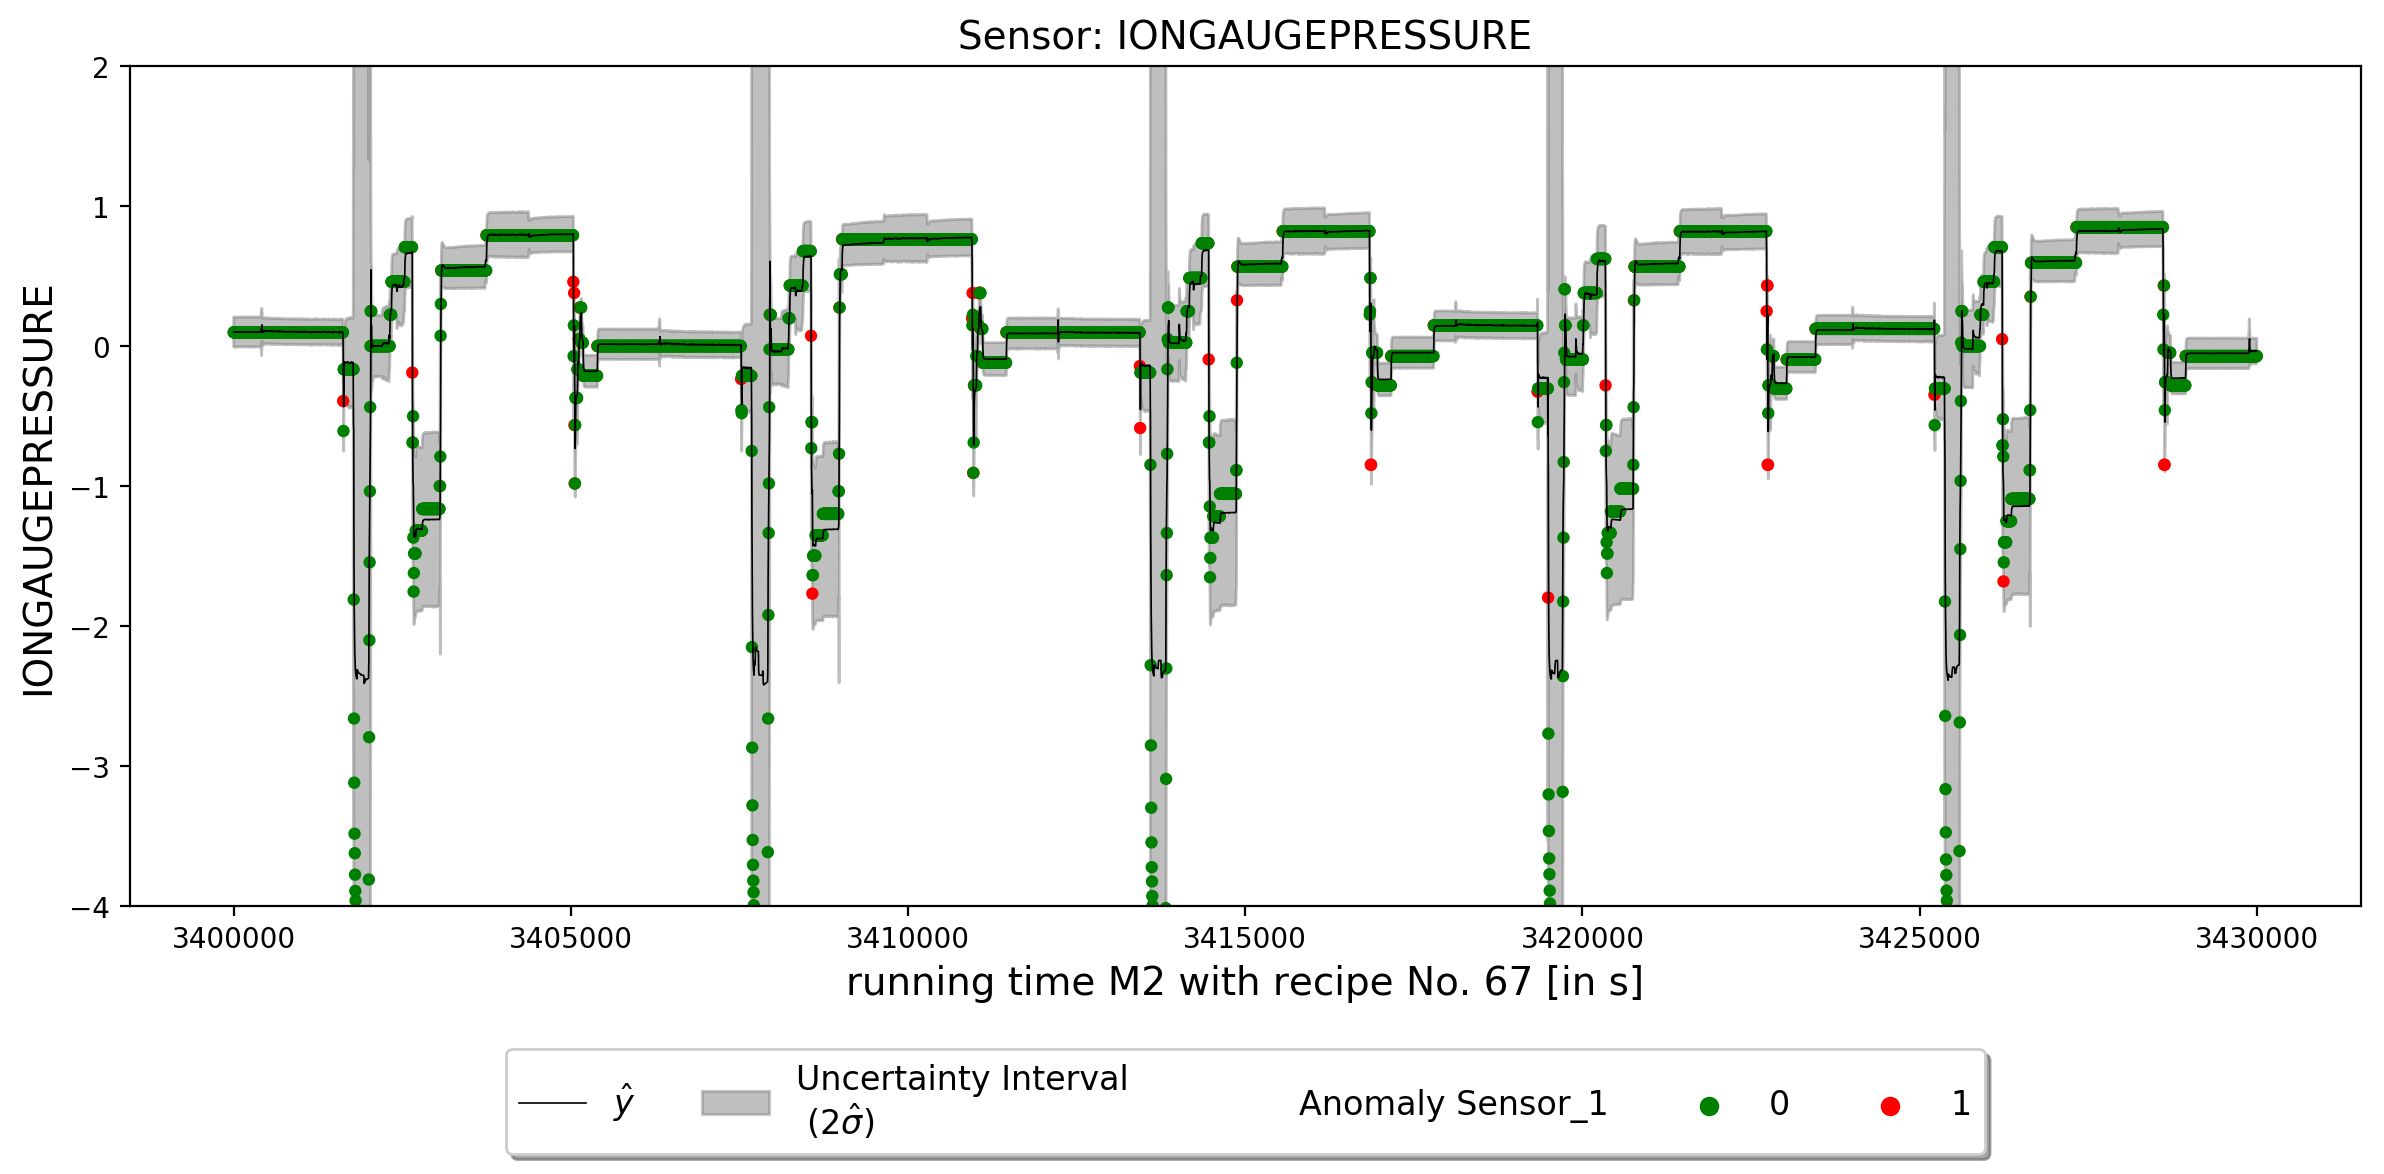

In [38]:
vis_classification(dataframe = subset_2,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=2,
                   line = False,
                   location_line = failures,
                   subset = 2,
                   label_line="failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_phm_no_error.png")
plt.show()

In [5]:
artifical_data = pd.read_csv("../../files/classification/MLE/phm67_2sigma_vis.csv", sep=";")

In [6]:
sigma = artifical_data.iloc[:,1+2*12]
t = artifical_data.iloc[:,0]

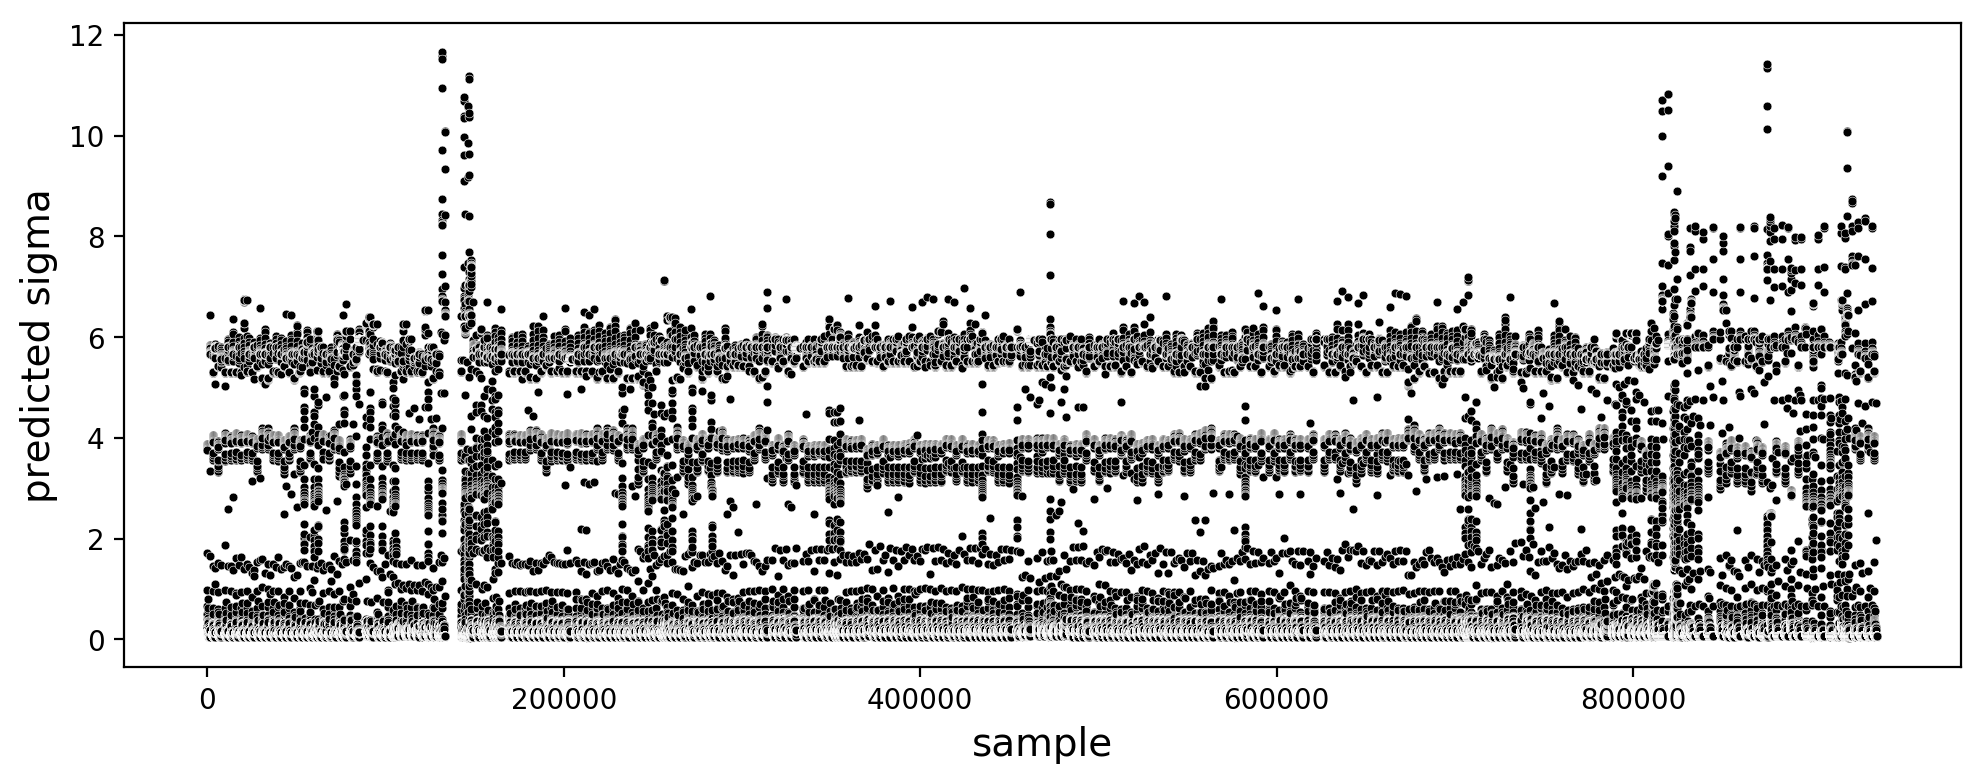

In [9]:
fig = plt.figure(figsize=(10,4), dpi=200)
ax = fig.add_subplot(111)
sns.scatterplot(
                x=t, 
                y=sigma,
                ax=ax, 
                s=10,
                color="black", 
                linewidth=.2)
ax.set_xlabel("sample", fontsize=14)
ax.set_ylabel("predicted sigma", fontsize=14)
#ax.set_title("Sensor: IONGAUGEPRESSURE", fontsize=14)
plt.tight_layout(pad=1)
plt.savefig("./pictures/different_variance.png")
plt.show()